# 05 - Cluster profiling  

Cluster profiling involves analyzing and interpreting the clusters created by clustering algorithms, such as K-Means or Hierarchical Clustering. It helps understand the characteristics of each cluster by summarizing their attributes.

In [12]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# load data
df = pd.read_csv("Numeric data (last year work).csv")

In [ ]:
# Step 1: Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Apply KMeans Clustering
# clustering into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)

# Step 3: Add cluster labels back to the original DataFrame
print("\nCluster Assignments:")
print(df.head())

# unreadable table
# that is why I created a new one below


Cluster Assignments:
   Rating    Votes  Meta Score  Year  Duration  Action  Adventure  Animation  \
0     6.5  90000.0        67.0  2023       138       0          0          0   
1     7.4  24000.0        66.0  2023       116       0          1          0   
2     7.0  21000.0        85.0  2023       117       0          0          0   
3     7.1  56000.0        54.0  2023       157       1          1          0   
4     6.6  66000.0        64.0  2023       158       1          1          0   

   Biography  Comedy  ...  PG Rating_PG  PG Rating_PG-13  PG Rating_Passed  \
0          0       0  ...             0                0                 0   
1          0       1  ...             1                0                 0   
2          0       1  ...             0                0                 0   
3          0       0  ...             0                1                 0   
4          1       0  ...             0                0                 0   

   PG Rating_R  PG Rating_TV

In [ ]:
# Cluster Profiling: Calculate mean values for each feature in each cluster
cluster_profiles = df.groupby("Cluster").mean()

# Format the table for better readability using pandas Styler
formatted_profiles = cluster_profiles.style.format("{:.2f}") \
    .background_gradient(cmap="coolwarm", axis=1) \
    .set_caption("Cluster Profiles (Mean Values)") \
    .set_table_styles([
        {"selector": "caption", "props": [("font-size", "16px"), ("color", "black"), ("font-weight", "bold"), ("text-align", "center")]}
    ])

# Display the formatted table
print("\nCluster Profiles (Mean Values):")
display(formatted_profiles)

# on the left column we can numbers of clusters
# and below each variable we see the mean in this cluster



Cluster Profiles (Mean Values):


,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,PG Rating_13+,PG Rating_16+,PG Rating_18+,PG Rating_Approved,PG Rating_G,PG Rating_GP,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.97,177860.62,62.12,2007.15,104.14,0.20,0.69,0.41,0.01,0.64,0.01,0.00,0.23,0.47,0.16,0.00,0.01,0.01,0.01,0.01,0.03,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.82,0.04,0.00,0.01,0.00,0.00,0.00,0.00,0.01
1,6.82,220655.20,59.74,2009.19,116.76,0.56,0.31,0.00,0.01,0.16,0.28,0.00,0.36,0.00,0.10,0.00,0.23,0.00,0.00,0.22,0.01,0.18,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.38,0.00,0.59,0.00,0.00,0.01,0.00,0.00
2,7.03,164583.04,64.89,2007.79,113.06,0.04,0.05,0.00,0.14,0.53,0.10,0.00,0.71,0.01,0.06,0.07,0.02,0.06,0.04,0.02,0.34,0.02,0.05,0.02,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.06,0.34,0.00,0.56,0.00,0.00,0.01,0.00,0.00


In [19]:
# Step 4: Create cluster profiling
profile = df.groupby("Cluster").mean()


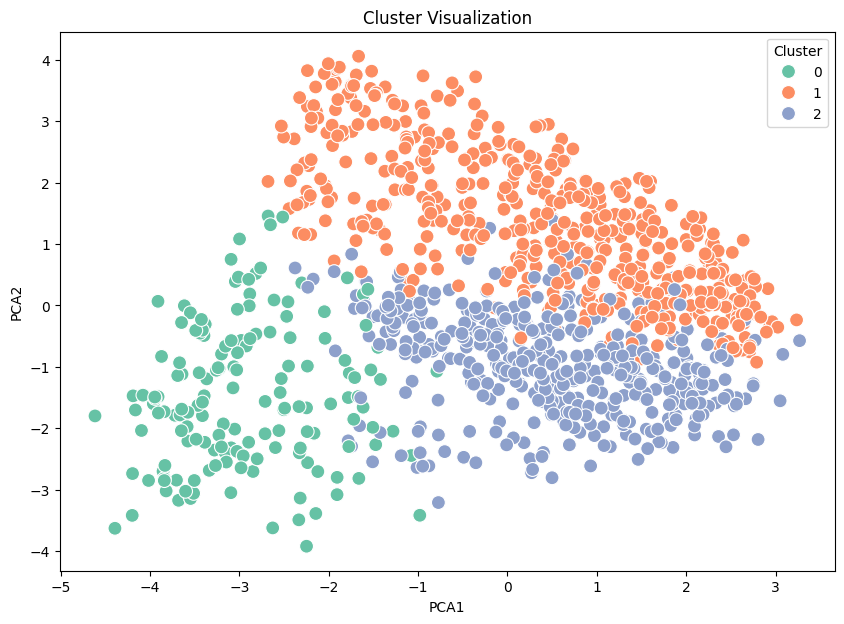

In [ ]:
# Step 5: Visualize the clusters (using PCA for dimensionality reduction if >2 dimensions)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df["PCA1"] = reduced_data[:, 0]
df["PCA2"] = reduced_data[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set2", s=100)
plt.title("Cluster Visualization")
plt.show()

# Green: Cluster 0
# Orange: Cluster 1
# Blue: Cluster 2

# we can almost between all categories clear boundaries
# however, there is some overlap between clusters 1 and 2

# Clusters 1 and 2 are closer to each other, 
# suggesting they share some similarities

# Cluster 1 appearing larger than the others

In [18]:
# Step 6: Cluster Size
cluster_size = df["Cluster"].value_counts()
print("\nCluster Sizes:")
print(cluster_size)


Cluster Sizes:
Cluster
1    521
2    450
0    160
Name: count, dtype: int64
